In [31]:
# k-Nearest Neighbors with Feature Selection Implementation

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\fs_train_data_2.csv")

In [34]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,count_families,has_secondary_use,damage_grade
0,30,266,1224,1,25,5,2,t,r,n,...,0,1,0,0,0,0,0,0,0,2
1,17,409,12182,2,0,13,7,t,r,n,...,0,1,0,0,0,0,0,1,0,3
2,17,716,7056,2,5,12,6,o,r,q,...,0,1,0,0,0,0,0,1,0,3
3,4,651,105,2,80,5,4,n,r,n,...,0,1,0,0,0,0,0,1,0,2
4,3,1387,3909,5,40,5,10,t,r,n,...,0,0,0,1,0,0,0,1,0,2


In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [36]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])

In [37]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,count_families,has_secondary_use,damage_grade
0,30,266,1224,1,25,5,2,2,2,0,...,0,1,0,0,0,0,0,0,0,2
1,17,409,12182,2,0,13,7,2,2,0,...,0,1,0,0,0,0,0,1,0,3
2,17,716,7056,2,5,12,6,1,2,1,...,0,1,0,0,0,0,0,1,0,3
3,4,651,105,2,80,5,4,0,2,0,...,0,1,0,0,0,0,0,1,0,2
4,3,1387,3909,5,40,5,10,2,2,0,...,0,0,0,1,0,0,0,1,0,2


In [38]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,23].values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=511)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=511)

In [41]:
y_pred = classifier.predict(X_test)


C:\Users\Brad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.04      0.08      5088
           2       0.58      0.94      0.72     29700
           3       0.50      0.10      0.16     17333

    accuracy                           0.57     52121
   macro avg       0.52      0.36      0.32     52121
weighted avg       0.54      0.57      0.47     52121



In [43]:
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']

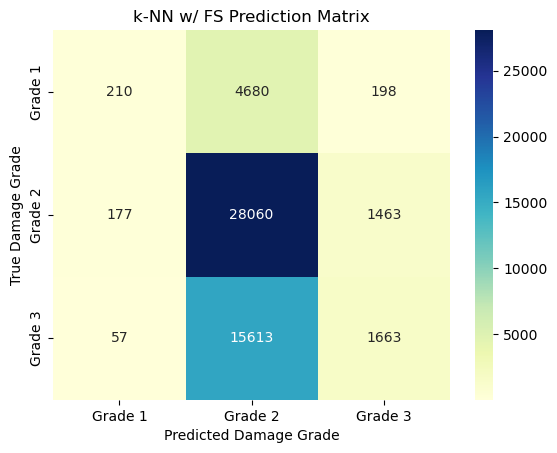

In [44]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("k-NN w/ FS Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()